# **Calculating Expected Draws for Consecutive Black Cards**

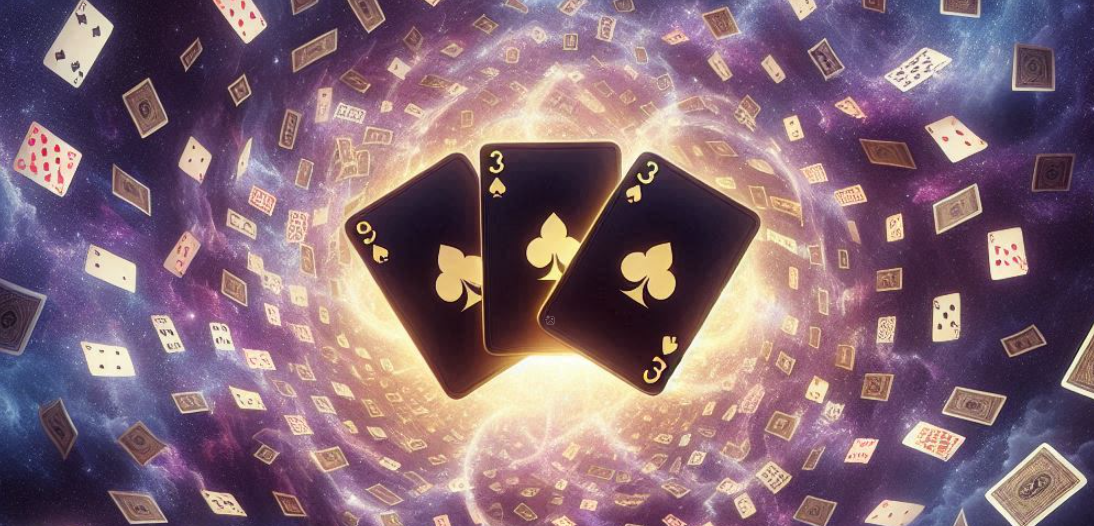

This notebook addresses a probability problem involving an infinite deck of cards where the probability of drawing a red card is 4/5. The goal is to determine the expected number of draws required for Jane to draw three consecutive black cards. We'll use a Markov chain approach, defining states based on the number of consecutive black cards drawn.

Jane draws cards from an infinite deck. The probability of drawing a red card is $4/5$, and the probability of drawing a black card is $1/5$. We aim to find the expected number of draws Jane needs to draw three consecutive black cards.

In [3]:
# Import necessary libraries
from sympy import symbols, Eq, solve

In [6]:
# Define symbols for expected values from each state
E0, E1, E2 = symbols("E0 E1 E2")

State transitions:

* From state 0, Jane can either draw a black card and move to state 1, or draw a red card and stay in state 0.
* From state 1, Jane can either draw another black card and move to state 2, or draw a red card and revert to state 0.
* From state 2, Jane can either draw the third black card and finish, or draw a red card and revert to state 0.

Then, the equations are:

$$ E_0 = 1 + \frac{1}{5}E_1 + \frac{4}{5}E_0 $$

$$ E_1 = 1 + \frac{1}{5}E_2 + \frac{4}{5}E_0 $$

$$ E_2 = 1 + \frac{1}{5} \times 0 + \frac{4}{5}E_0 $$

Equations based on the state description:
* $E_0:$ Expected number of draws starting with no black cards
* $E_1:$ Expected number of draws starting with one black card
* $E_2:$ Expected number of draws starting with two consecutive black cards

In [7]:
# Transition from E2, black card completes the sequence, red card resets to E0
eq_E2 = Eq(E2, 1 + (1 / 5) * 0 + (4 / 5) * E0)

# Transition from E1, move to E2 or reset to E0
eq_E1 = Eq(E1, 1 + (1 / 5) * E2 + (4 / 5) * E0)

# Transition from E0, move to E1 or stay at E0
eq_E0 = Eq(E0, 1 + (1 / 5) * E1 + (4 / 5) * E0)

In [8]:
# Solve the system of equations
solution = solve((eq_E0, eq_E1, eq_E2), (E0, E1, E2))
solution

{E0: 155.000000000000, E1: 150.000000000000, E2: 125.000000000000}

The equations were solved using a symbolic algebra library, and the results are as follows:

* $E_0 = 155$

This is the expected number of draws needed starting with zero black cards to get three consecutive black cards.

* $E_1 = 150$

This is the expected number of draws needed if starting with one black card already drawn.


* $E_2 = 125$

This is the expected number of draws needed if starting with two consecutive black cards already drawn.
These values confirm our earlier calculations and provide the complete set of expectations based on the initial conditions of the problem. Here's a brief explanation of how these solutions relate to the setup:

* Starting from scratch (E0): On average, it will take 155 draws to get three consecutive black cards.

* One black card already (E1): If Jane already has one black card, it will take her on average 150 more draws to achieve three in a row.

* Two consecutive black cards (E2): Starting with two black cards, it will take an average of 125 more draws to get the third and complete the sequence.

## **Simulation**

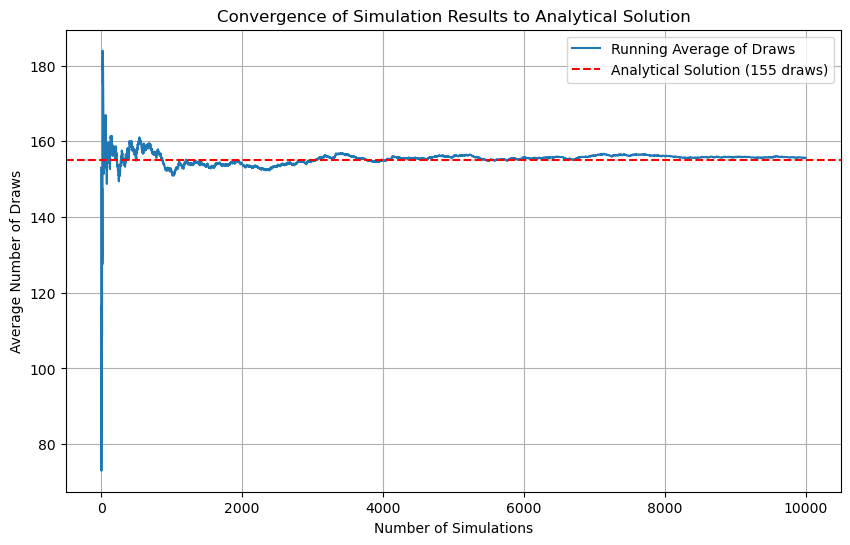

In [14]:
import random
import matplotlib.pyplot as plt


def draw_card():
    return random.random() < 0.2  # True for black, False for red


def simulate_three_black_consecutive_draws():
    count_draws = 0
    consecutive_blacks = 0
    while consecutive_blacks < 3:
        if draw_card():
            consecutive_blacks += 1
        else:
            consecutive_blacks = 0
        count_draws += 1
    return count_draws


# Incremental simulation
num_simulations = 10000
results = []
running_averages = []

for _ in range(num_simulations):
    result = simulate_three_black_consecutive_draws()
    results.append(result)
    running_average = sum(results) / len(results)
    running_averages.append(running_average)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(running_averages, label="Running Average of Draws")
plt.axhline(y=155, color="r", linestyle="--", label="Analytical Solution (155 draws)")
plt.xlabel("Number of Simulations")
plt.ylabel("Average Number of Draws")
plt.title("Convergence of Simulation Results to Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()